In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import time_evolutor as te
import plotting as p

import sys
sys.path.append('/../../temp_prog/')
import tur_calculator as tc



In [2]:
#------------------SETUP-------------------

T_L = 30 
T_R = 10
V_B = 30
eps = 40
delta_gamma = 0.04
delta_epsilon = 0.04

INPUT = {
    'eps': eps,
    'omega': 0, 
    'u': 250, 
    'V_B': V_B,
    'gamma': 1,  
    'T_L': T_L,
    'T_R': T_R,
    'delta_gamma': delta_gamma,
    'delta_epsilon': delta_epsilon,
}

initial = [1/4,1/4,1/4,1/4,0,0]         #beginns with both QDs empty
ti_array = np.linspace(0,1e5,10000)

In [3]:
importlib.reload(te)
sys, rho_ss, rho_t, I_ss, I, I_var, P, J_QH = te.calculate_paper_meta(initial, ti_array, **INPUT)

[[ 1.  0.  0.  0. -0.  0.]
 [ 0.  1. -0. -0. -0. -0.]
 [ 0. -0.  1. -0.  0.  0.]
 [-0.  0. -0.  1. -0. -0.]
 [-0.  0.  0. -0.  1. -0.]
 [ 0. -0. -0. -0. -0.  1.]]
check l1 is identity: [ 0.5  0.5  0.5  0.5 -0.   0. ]
eigenvalues: [-1.54390389e-16+0.j -3.56957004e-03+0.j -1.78562965e+00+0.j
 -1.78634276e+00+0.j -3.99712434e+00+0.j -4.00000000e+00+0.j]

~~ Re(lambda3)/re(lambda2): ~~
-1.7863427550227249/-0.0035695700416958683=500.2366188573849
dim 6
I_ss:  0.05579217297117964
right lead?  -0.055792172971179645
Current:  0.055792172971178645
heat current:  [ 3.06951923 -1.39575404]
J_QH:  [-172.40871884    1.71813103    1.76552363 ...    3.06951923    3.06951923
    3.06951923]


Text(0.5, 1.0, 'First 4 datapoints')

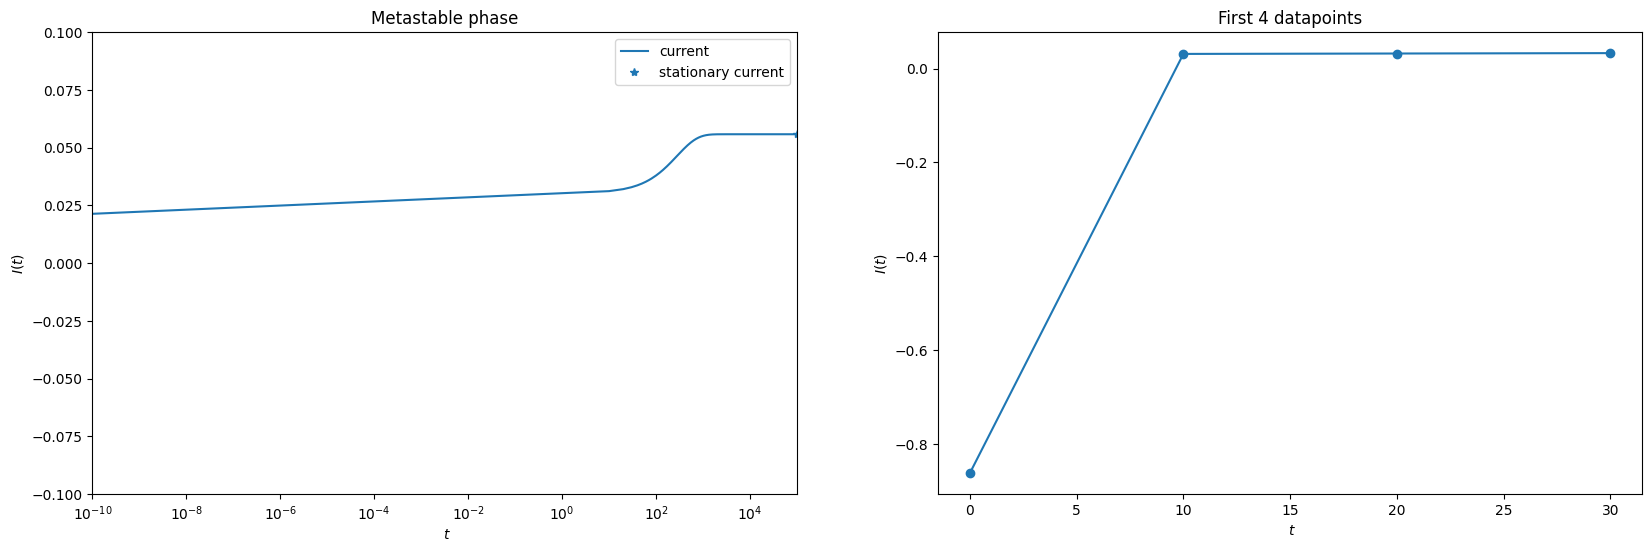

In [4]:
#plotting particle current

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.plot(ti_array,I, label = 'current')
ax1.plot(ti_array[-1], I_ss, '*', color = 'C0', label='stationary current')

ax1.legend()

ax1.set_xlabel(r' $t$')
ax1.set_ylabel(r'$I(t)$')
ax1.set_xscale('log')
ax1.set_xlim(1e-10,1e5)
ax1.set_ylim(-0.1, 0.1)
ax1.set_title('Metastable phase')

ax2.plot(ti_array[0:4], I[0:4])
ax2.scatter(ti_array[0:4], I[0:4])
#ax2.set_ylim(-0.01, 0.01)
ax2.set_xlabel(r' $t$')
ax2.set_ylabel(r'$I(t)$')
ax2.set_title('First 4 datapoints')

In [5]:
print(P)

[-25.86378534   0.93494935   0.9608593  ...   1.67376519   1.67376519
   1.67376519]


39.96 40.04


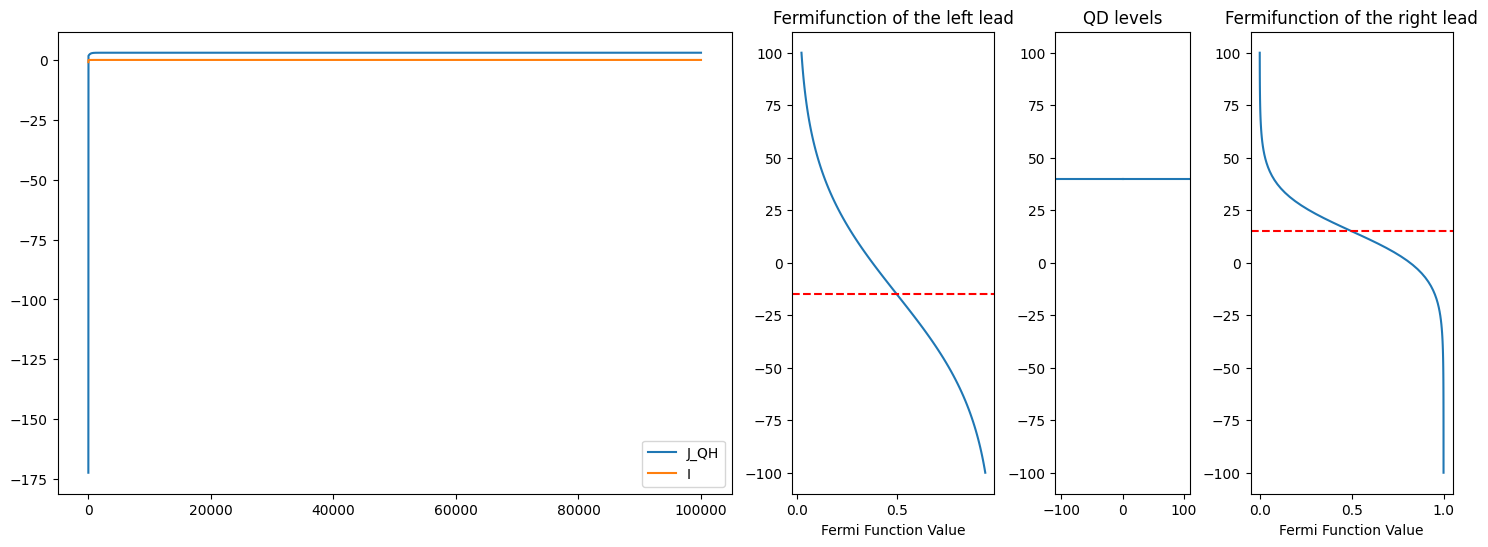

In [6]:
epsilons = np.linspace(-100,100,100)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6), gridspec_kw={'width_ratios': [10, 3, 2, 3]}) 

ax1.plot(ti_array, J_QH, label='J_QH')
ax1.plot(ti_array, I, label='I')

ax1.legend()

mu_L = -V_B/2       
mu_R = V_B/2 
eps1 = eps-delta_epsilon
eps2 =eps+delta_epsilon
print(eps1, eps2)

importlib.reload(p)
p.plot_fermi_function(epsilons, mu_L, T_L, ax2, "Fermifunction of the left lead")
p.plot_double_qd_leves(epsilons, eps1, eps2, ax3, 'QD levels')
p.plot_fermi_function(epsilons, mu_R, T_R, ax4, "Fermifunction of the right lead")

plt.show()

In [8]:
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)

In [11]:
print('I', I)
print('P', P)
print('I_var', I_var)
print('heat current: ', J_QH)
print('sigma: ', sigma)
print('eff: ', eff)

print('Min-TUR: ',np.nanmin(TUR))
print('TUR at: ', TUR[100])

I [-0.86212618  0.03116498  0.03202864 ...  0.05579217  0.05579217
  0.05579217]
P [-25.86378534   0.93494935   0.9608593  ...   1.67376519   1.67376519
   1.67376519]
I_var [-30.28191187   0.43857165   0.44762149 ...   0.36119684   0.36119684
   0.36119684]
heat current:  [-172.40871884    1.71813103    1.76552363 ...    3.06951923    3.06951923
    3.06951923]
sigma:  [       nan 0.02104713 0.02161565 ... 0.0372581  0.0372581  0.0372581 ]
eff:  [       nan 0.5441665  0.54423474 ... 0.54528578 0.54528578 0.54528578]
Min-TUR:  4.323326661695495
TUR at:  4.567517336955569


Text(0.5, 1.0, 'Current')

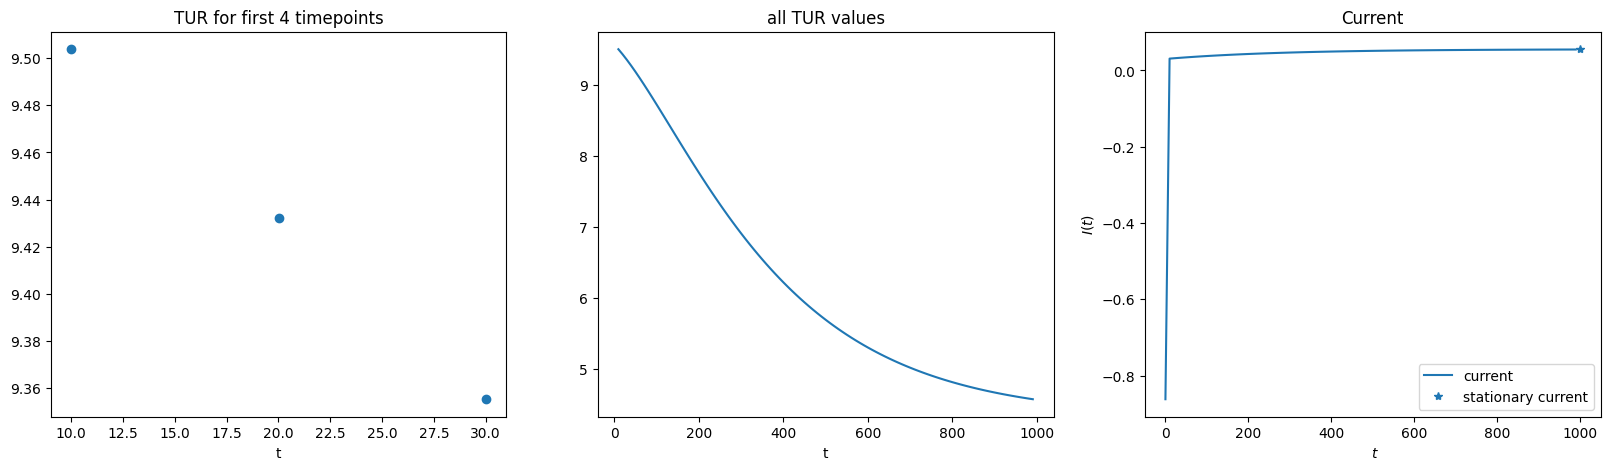

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

TUR_masked = np.ma.masked_where(TUR >= 2, TUR)
axes[0].scatter(ti_array[0:4], TUR[0:4])
axes[0].set_title('TUR for first 4 timepoints')
axes[0].set_xlabel('t')

axes[1].plot(ti_array[0:100], TUR[0:100])
axes[1].set_title('all TUR values')
axes[1].set_xlabel('t')


axes[2].plot(ti_array[0:100],I[0:100], label = 'current')
axes[2].plot(ti_array[100], I_ss, '*', color = 'C0', label='stationary current')

axes[2].legend()

axes[2].set_xlabel(r' $t$')
axes[2].set_ylabel(r'$I(t)$')
axes[2].set_title('Current')


In [ ]:
print(np.min(TUR))
print(TUR[0])

-1.7994474215038554
-1.7994474215038554
